In [1]:
import pandas as pd
from math import log2
%matplotlib inline

# Decision-Tree Learning

Decision tree learning uses a decision tree as a predictive model observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves). It is one of the predictive modelling approaches used in statistics, data mining and machine learning. Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees.  
[Source](https://en.wikipedia.org/wiki/Decision_tree_learning)

## Entropy

$$
E(S) = - \sum\limits_{i=1}^{n} p_1 \cdot \log_2(p_i) 
$$


In [2]:
def entropy(S):
            
    outcomes = pd.unique(S[final])
    ent = lambda p: 0 if p == 0 else p * log2(p) 
    
    return -sum([  ent( S[S[final] == o].size / S.size ) for o in outcomes ])


## Information
$$
I(S, A) = - \sum\limits_{i=1}^{n} \frac{|S_i|}{|S|} \cdot E(S_i)
$$

In [3]:
def information(S, A):
    partitions = pd.unique(S[A])

    return sum([( S[A][S[A] == p].size / S[A].size ) * 
            entropy( S[S[A] == p]) for p in partitions])
    

## Information Gain
$$
\mbox{Gain}(S, A) = E(S) - I(S,A)
$$

In [4]:
def gain(S, A):     
    return entropy(S) - information(S, A)

## Instrinsic Information
$$
\mbox{IntI}(S,A) = - \sum\limits_i \frac{|S_i|}{|S|} \cdot \log_2(\frac{|S_i|}{|S|})
$$

In [5]:
def intrinsic_information(S, A):
    partitions = pd.unique(S[A])

    return -sum([( S[A][S[A] == p].size / S[A].size ) * 
                log2( S[A][S[A] == p].size / S[A].size )  for p in partitions])

## Gain Ratio

$$
GR(S,A) = \frac{\mbox{Gain}(S,A)}{\mbox{IntI}(S,A)}
$$

In [6]:
def gain_ratio(S, A):
    return gain(S,A) / intrinsic_information(S,A)

## Gini-Index

$$
    \mbox{Gini}(S) = 1- \sum\limits_i p_i^2
$$

$$
    \mbox{Gini}(S, A)  = \sum\limits_i \frac{|s_i|}{|S|} \cdot \mbox{Gini}(S)
$$

In [7]:
def gini(S, A=None):
    
    if A == None:
        return 1-sum( 
            [(S[S[final] == o].size / S.size)**2 for o in  pd.unique(S[final])] 
        )
    
    return sum( [ ( S[A][S[A] == p].size / S[A].size ) * gini(S[S[A] == p]) for p in pd.unique(S[A])]  )

In [8]:
_exec = lambda f : {col: f(data, col) for col in data.columns if not col == final}

In [9]:
data = pd.read_csv('playgolf.txt')
final='Play Golf?'

out = pd.DataFrame( dict(
    gain = _exec(gain), 
    information = _exec(information), 
    gain_ratio = _exec(gain_ratio),
    gini = _exec(gini)
) )
out

,gain,gain_ratio,gini,information
Day,0.940286,0.246966,0.000000,0.000000
Humidity,0.151836,0.151836,0.367347,0.788450
Outlook,0.246750,0.156428,0.342857,0.693536
Temperature,0.029223,0.018773,0.440476,0.911063
Windy,0.048127,0.048849,0.428571,0.892159


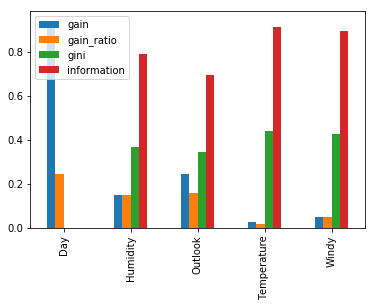

In [10]:
_ = out.plot(kind='bar')

In [11]:
data = pd.read_csv('lens24.dat')
final = 'class'
 
out = pd.DataFrame( dict(
    gain = _exec(gain), 
    information = _exec(information), 
    gain_ratio = _exec(gain_ratio),
    gini = _exec(gini)
) )
out

,gain,gain_ratio,gini,information
age,0.039397,0.024856,0.520833,1.286691
astic,0.377005,0.377005,0.465278,0.949082
specRx,0.039511,0.039511,0.527778,1.286577
tear,0.548795,0.548795,0.326389,0.777293


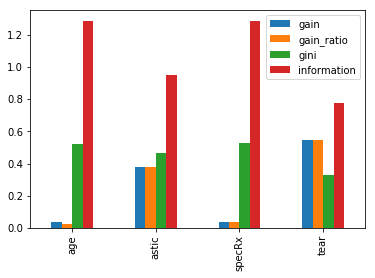

In [12]:
_ = out.plot(kind='bar')